In [2]:
import os
import sys

import numpy as np
import pandas as pd
from alphalens.tears import create_full_tear_sheet
from alphalens.utils import get_clean_factor_and_forward_returns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

current_notebook_dir = os.getcwd()
project_root_path = os.path.dirname(os.path.dirname(current_notebook_dir))
sys.path.append(project_root_path)

import Chapter1.utils as chap1_utils

chap1_utils.finlab_login()


輸入成功!


In [3]:
analysis_period_start_date = "2017-05-16"
analysis_period_end_date = "2021-05-15"

In [4]:
top_N_stocks = chap1_utils.get_top_stocks_by_market_value(
    excluded_industry=[
        "金融業",
        "金融保險業",
        "存托憑證",
        "建材營造"
    ],
    pre_list_date="2017-01-03"
)

Due to your status as a free user, the most recent data has been shortened or limited.
Daily usage: 0.9 / 500 MB - company_basic_info


In [5]:
len(top_N_stocks)

767

In [6]:
# 獲取指定股票代碼列表在給定日期範圍內的每日收盤價資料
# 對應到財報資料時間 2017-Q1~2020-Q4
close_price_data = chap1_utils.get_daily_close_prices_data(
    stock_symbols=top_N_stocks,
    start_date=analysis_period_start_date,
    end_date=analysis_period_end_date
)

/Users/houguanyu/Documents/code/python/stock/Quant/PythonQuantrading/Chapter1/utils.py:101: FutureWarning: YF.download() has changed argument auto_adjust default to True
  full_data = yf.download(stock_symbols, start=start_date, end=end_date)
[*********************100%***********************]  767 of 767 completed


In [7]:
close_price_data

Ticker,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9938,9939,9940,9941,9942,9943,9944,9945,9955,9958
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-16,17.395922,18.150354,7.539373,14.896709,7.083519,7.315918,14.888122,16.288330,18.226240,17.267315,...,73.171814,45.101028,18.551882,34.819096,53.063358,36.075706,16.116505,13.548565,13.600000,8.173238
2017-05-17,17.247242,17.956926,7.432178,14.896709,7.053942,7.279520,14.934645,16.457998,18.264210,17.296780,...,73.542114,45.101028,18.338949,35.339981,53.129269,35.873413,15.869823,13.492191,13.700000,8.121069
2017-05-18,17.222458,17.763491,7.432178,14.896709,7.068729,7.315918,14.888122,16.161076,18.188269,17.031582,...,73.023697,44.522808,18.179249,35.460182,52.931522,35.873413,15.869823,13.379444,14.350000,8.147154
2017-05-19,17.098558,17.892447,7.360715,14.838969,7.061337,7.388714,14.888122,16.033823,18.302181,17.031582,...,73.097755,44.450531,17.992929,38.986168,53.129269,36.210567,15.869823,13.229114,14.100000,8.164544
2017-05-22,17.148121,17.602297,7.360715,14.752363,7.039153,7.315918,14.888122,15.991406,18.416098,17.473577,...,73.023697,44.233700,17.673531,42.872765,53.195183,36.278000,15.787599,13.172738,14.150000,8.208018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-10,40.280830,39.641411,21.521509,19.485487,14.409400,23.347269,16.278692,21.995188,32.471283,48.295811,...,84.667946,66.322685,24.664589,79.526306,76.902634,60.029015,17.409174,25.080170,23.600000,112.870918
2021-05-11,39.290947,39.018356,20.757431,18.161943,13.608879,21.395155,16.230953,21.300604,31.892235,47.258049,...,82.955757,63.969589,24.032162,77.212799,72.881050,59.122238,17.877390,24.712696,21.650000,106.881851
2021-05-12,37.768036,37.811207,19.441519,17.095758,12.247992,20.575268,14.607859,19.494682,30.288715,44.224594,...,74.994057,60.832111,23.362535,72.585823,68.613235,56.311207,19.665129,23.059059,19.549999,97.207199


In [8]:
# 要進行主成份分析的因子列表
all_factors_list = [
    "營業利益",
    "營運現金流",
    "歸屬母公司淨利",
    "經常稅後淨利",
    "ROE稅後",
    "營業利益成長率",
    "稅前淨利成長率",
    "稅後淨利成長率",
    "應收帳款週轉率"
]

In [ ]:
# 取得 Finlab 多個因子資料
# 將多個因子資料集整合(concat)成一個資料集
factors_data_dict = {}
for factor in all_factors_list:
    factor_data = (
        chap1_utils.get_factor_data(
            stock_symbols=top_N_stocks,
            factor_name=factor,
            trading_days=list(close_price_data.index),
        )               # 原本 chap1_utils.get_factor_data 返回的是 multiindex 的 DataFrame (datetime, asset)
        .reset_index()  # 將 DataFrame 的索引重置為普通欄位
        .assign(factor_name=factor)  # 新增一個欄位並賦值
    )
    factors_data_dict[factor] = factor_data

Daily usage: 2.2 / 500 MB - fundamental_features:營業利益
Daily usage: 4.7 / 500 MB - etl:financial_statements_deadline
Daily usage: 30.7 / 500 MB - price:收盤價
Daily usage: 32.0 / 500 MB - fundamental_features:營運現金流
Daily usage: 33.4 / 500 MB - fundamental_features:歸屬母公司淨利
Daily usage: 34.7 / 500 MB - fundamental_features:經常稅後淨利
Daily usage: 36.1 / 500 MB - fundamental_features:ROE稅後
Daily usage: 37.5 / 500 MB - fundamental_features:營業利益成長率
Daily usage: 39.0 / 500 MB - fundamental_features:稅前淨利成長率
Daily usage: 40.4 / 500 MB - fundamental_features:稅後淨利成長率
Daily usage: 41.8 / 500 MB - fundamental_features:應收帳款週轉率


In [11]:
factors_data_dict["營業利益"]

,datetime,asset,value,factor_name
0,2017-05-16,1101,1941630.0,營業利益
1,2017-05-16,1102,442220.0,營業利益
2,2017-05-16,1103,24292.0,營業利益
3,2017-05-16,1104,47681.0,營業利益
4,2017-05-16,1108,28189.0,營業利益
...,...,...,...,...
737313,2021-05-14,9943,232926.0,營業利益
737314,2021-05-14,9944,38688.0,營業利益
737315,2021-05-14,9945,387438.0,營業利益
737316,2021-05-14,9955,4525.0,營業利益


In [27]:
print(factors_data_dict["營業利益"].value)
print(len(factors_data_dict["營業利益"].value))

0         1941630.0
1          442220.0
2           24292.0
3           47681.0
4           28189.0
            ...    
737313     232926.0
737314      38688.0
737315     387438.0
737316       4525.0
737317      32541.0
Name: value, Length: 737318, dtype: float64
737318


In [13]:
# 將所有因子資料合併成一個 DataFrame
concat_factors_data = pd.concat(factors_data_dict.values(), ignore_index=True)

# 將資料格式轉換為索引是 datetime 和 asset，欄位名稱是因子名稱
concat_factors_data = concat_factors_data.pivot_table(
    index=["datetime", "asset"], columns="factor_name", values="value"
)

# 處理異常值和遺失值，將無窮大的值替換為 NaN，並透過向前填補的方法填補遺失值
concat_factors_data.replace([np.inf, -np.inf], np.nan, inplace=True)
print(concat_factors_data)

factor_name          ROE稅後    應收帳款週轉率    歸屬母公司淨利       營業利益     營業利益成長率  \
datetime   asset                                                          
2017-05-16 1101   0.789102   1.096983   832244.0  1941630.0  301.255247   
           1102   0.104497   0.912445   236681.0   442220.0    8.853618   
           1103  -0.662850   1.922639  -111320.0    24292.0  126.614370   
           1104   1.703072   1.221236   283869.0    47681.0   50.612799   
           1108   0.394747   1.285371    18766.0    28189.0  -78.808291   
...                    ...        ...        ...        ...         ...   
2021-05-14 9943   6.997373  24.156864   301393.0   232926.0   18.347086   
           9944   0.928190   1.239493    23293.0    38688.0   91.629105   
           9945   4.610052   3.455325  2154861.0   387438.0   42.643919   
           9955   0.307972  14.819491     5272.0     4525.0  110.188688   
           9958   0.132738   0.847129    14385.0    32541.0   25.099954   

factor_name           營運

In [18]:
# 進行主成份分析
# 首先對因子數據進行標準化處理，以保證每個因子的尺度相同。
# 這個標準化過程會將每個因子數據的平均值調整為 0，標準差調整為 1。
scaler = StandardScaler()
scale_concat_factors_data = scaler.fit_transform(concat_factors_data.dropna().values)

In [19]:
scale_concat_factors_data.shape

(734396, 9)

In [20]:
# 設置要提取的主成份數量為 8 ，這裡選擇了比財物因子數少一個的主成份數量。
pca_components_num = len(all_factors_list) - 1
print(pca_components_num)
pca = PCA(n_components=pca_components_num)
# 對標準化後的資料進行 PCA 分析。
principal_components = pca.fit_transform(scale_concat_factors_data)

8


In [22]:
print(principal_components)
print(f"shape of principal_components: {principal_components.shape}")


[[ 0.47136882  0.29484287 -0.06119301 ...  0.08313282 -0.05292174
   0.22324234]
 [-0.13983897 -0.06987321 -0.06223135 ... -0.0258556  -0.02643364
   0.06291843]
 [-0.28521808 -0.01263826 -0.07099931 ...  0.01225155  0.09043267
   0.03380567]
 ...
 [ 0.57108453 -0.0446702   0.067068   ... -0.02025193 -0.23304694
  -0.45759546]
 [-0.27553247  0.01970688  0.06572958 ...  0.02940384  0.02511528
   0.00128703]
 [-0.24805778 -0.01374315 -0.06305545 ...  0.02782052  0.06211278
   0.00585905]]
shape of principal_components: (734396, 8)


In [23]:
type(principal_components)

numpy.ndarray

In [24]:
# 將原始資料轉換為主成份分析結果表，每一行代表一個主成份。
principal_df = pd.DataFrame(
    data=principal_components,
    index=concat_factors_data.dropna().index,
    columns=[f"PC{i}" for i in range(1, pca_components_num + 1)],
    )
principal_df

PC1       PC2       PC3       PC4       PC5       PC6  \
datetime   asset                                                               
2017-05-16 1101   0.471369  0.294843 -0.061193 -0.030127  0.000068  0.083133   
           1102  -0.139839 -0.069873 -0.062231 -0.030680 -0.014202 -0.025856   
           1103  -0.285218 -0.012638 -0.070999 -0.018906  0.021878  0.012252   
           1104  -0.182260 -0.045217 -0.019609 -0.067084 -0.034825 -0.012204   
           1108  -0.272371 -0.088598 -0.052047 -0.026361 -0.034163 -0.028175   
...                    ...       ...       ...       ...       ...       ...   
2021-05-14 9943  -0.126746 -0.015158  0.310038 -0.010444 -0.051079 -0.006579   
           9944  -0.263465  0.011960 -0.039704 -0.050681 -0.017809  0.022286   
           9945   0.571085 -0.044670  0.067068 -0.104521 -0.076134 -0.020252   
           9955  -0.275532  0.019707  0.065730  0.056757  0.046186  0.029404   
           9958  -0.248058 -0.013743 -0.063055 -0.031034 -0.015008  0.027821   

                       PC7       PC8  
datetime   asset                      
2017-05-16 1101  -0.052922  0.223242  
           1102  -0.026434  0.062918  
           1103   0.090433  0.033806  
           1104  -0.034632 -0.057992  
           1108   0.011110  0.003507  
...                    ...       ...  
2021-05-14 9943  -0.014181 -0.016984  
           9944   0.017959  0.004536  
           9945  -0.233047 -0.457595  
           9955   0.025115  0.001287  
           9958   0.062113  0.005859  

[734396 rows x 8 columns]

In [ ]:
# 產生主成份係數表
loadings = pd.DataFrame(
    pca.components_,
    columns=concat_factors_data.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)],
)
print("主成份係數表, index 是第i個主成份, columns 是第j個財報因子：")
loadings

主成份係數表, index 是第i個主成份, columns 是第j個財報因子：


factor_name,ROE稅後,應收帳款週轉率,歸屬母公司淨利,營業利益,營業利益成長率,營運現金流,稅前淨利成長率,稅後淨利成長率,經常稅後淨利
PC1,0.015700,-0.002921,0.511761,0.509195,0.002340,0.464477,0.005706,0.000817,0.512630
PC2,0.073149,-0.005448,-0.001407,-0.003416,0.193276,-0.008182,0.700606,0.682887,0.000170
PC3,0.657769,0.743756,-0.001206,-0.003804,0.092593,-0.011373,-0.019106,-0.071287,-0.000715
PC4,-0.573903,0.592238,0.004805,0.004822,-0.536595,0.010057,0.044381,0.172692,0.003933
PC5,-0.480075,0.309883,0.001113,0.003964,0.807963,0.007762,-0.034358,-0.139415,0.001305
PC6,-0.042054,0.003362,0.001196,-0.002183,-0.115436,-0.006556,0.710998,-0.692332,0.001938
PC7,0.011356,0.001638,-0.295837,-0.246937,-0.000142,0.884821,0.008358,-0.000917,-0.261519
PC8,0.002638,0.000756,-0.368324,0.823332,-0.001278,-0.020911,0.003647,-0.000440,-0.431279


In [29]:
# 產生主成份的資訊保留比例表
explained_variance_ratio = pd.DataFrame(
    pca.explained_variance_ratio_,
    index=[f"PC{i+1}" for i in range(pca.n_components_)],
    columns=["可解釋比例"],
)
print("主成份各自可解釋比例")
explained_variance_ratio

主成份各自可解釋比例


,可解釋比例
PC1,0.412289
PC2,0.140363
PC3,0.111472
PC4,0.110797
PC5,0.110149
PC6,0.082707
PC7,0.028250
PC8,0.003661


In [30]:
# 產生主成份的資訊保留累積比例表
cumulative_variance_ratio = pd.DataFrame(
    np.cumsum(pca.explained_variance_ratio_),
    index=[f"使用前{i+1}個主成份" for i in range(pca.n_components_)],
    columns=["累積可解釋比例"],
)
print("累積可解釋比例：")
cumulative_variance_ratio

累積可解釋比例：


,累積可解釋比例
使用前1個主成份,0.412289
使用前2個主成份,0.552652
使用前3個主成份,0.664124
使用前4個主成份,0.774921
使用前5個主成份,0.885070
使用前6個主成份,0.967776
使用前7個主成份,0.996027
使用前8個主成份,0.999688


Dropped 0.1% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-27.019932,-0.062112,-0.302342,1.024393,146923,20.026689
2,-0.089373,-0.035979,-0.057290,0.009999,146917,20.025871
3,-0.056276,-0.012878,-0.033666,0.007777,145956,19.894880
4,-0.033195,0.031122,-0.006061,0.012915,146917,20.025871
5,0.001730,53.770564,0.399282,2.237824,146923,20.026689


Returns Analysis


,1D
Ann. alpha,-0.005
beta,0.045
Mean Period Wise Return Top Quantile (bps),1.540
Mean Period Wise Return Bottom Quantile (bps),-1.188
Mean Period Wise Spread (bps),2.728


<Figure size 640x480 with 0 Axes>

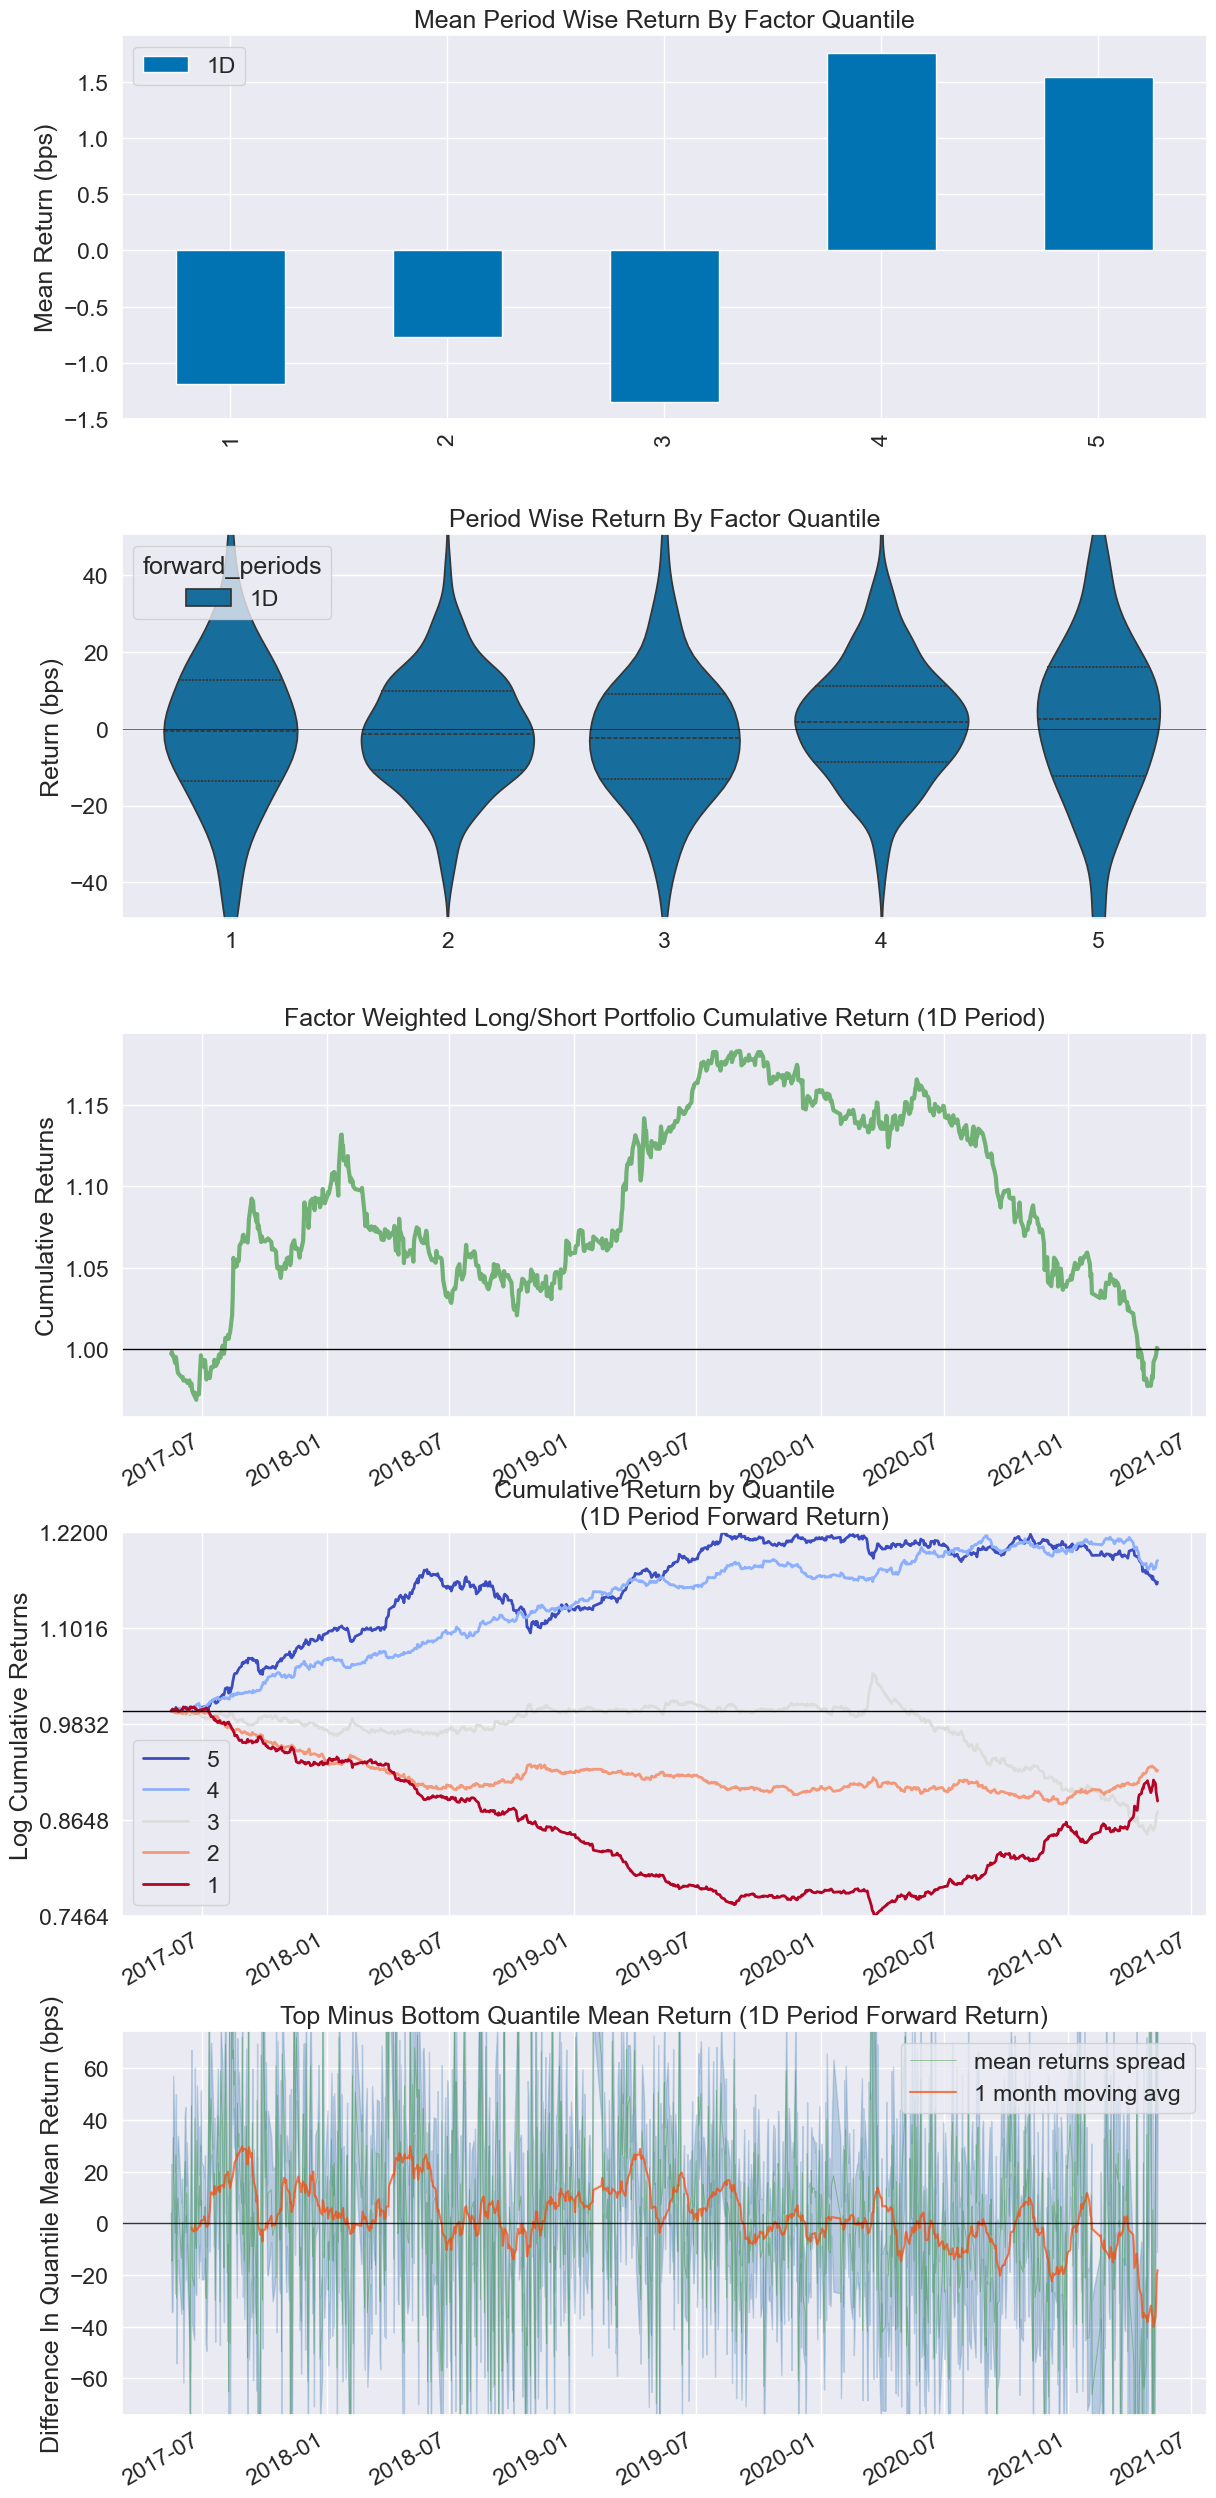

Information Analysis


,1D
IC Mean,0.006
IC Std.,0.059
Risk-Adjusted IC,0.109
t-stat(IC),3.391
p-value(IC),0.001
IC Skew,0.156
IC Kurtosis,0.181


/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/alphalens/performance.py:118: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouper.append(pd.Grouper(freq=by_time))


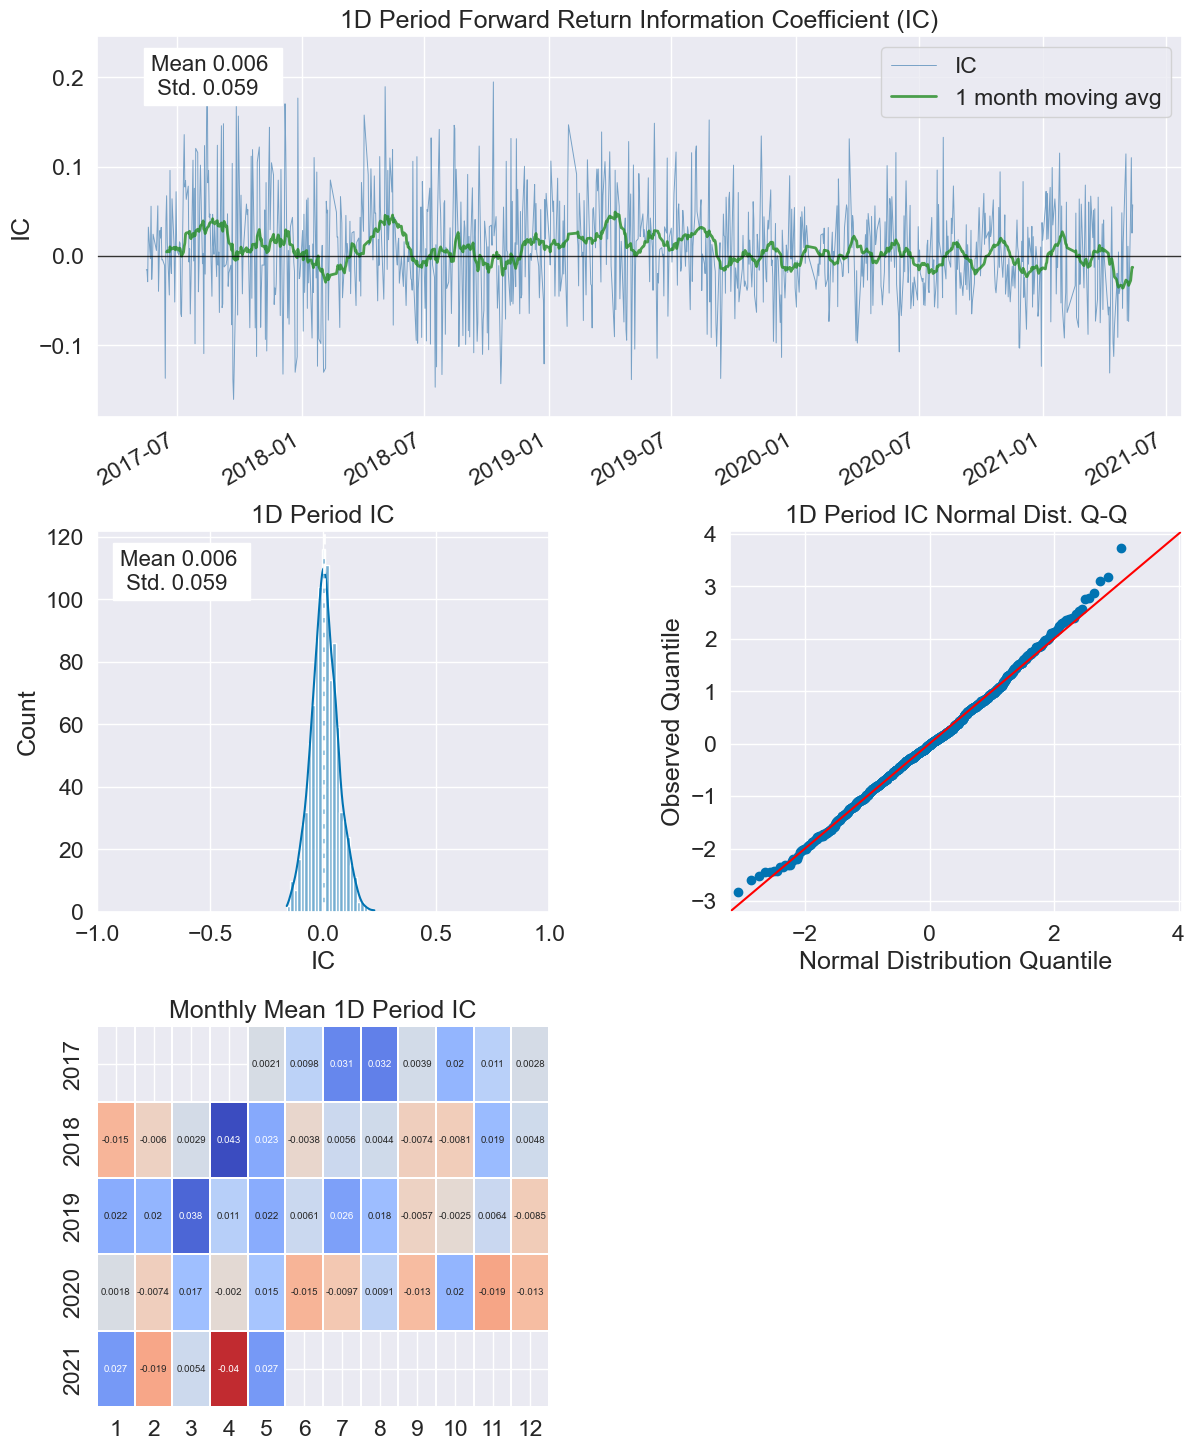

/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/alphalens/utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,1D
Quantile 1 Mean Turnover,0.004
Quantile 2 Mean Turnover,0.006
Quantile 3 Mean Turnover,0.006
Quantile 4 Mean Turnover,0.006
Quantile 5 Mean Turnover,0.005


,1D
Mean Factor Rank Autocorrelation,0.995


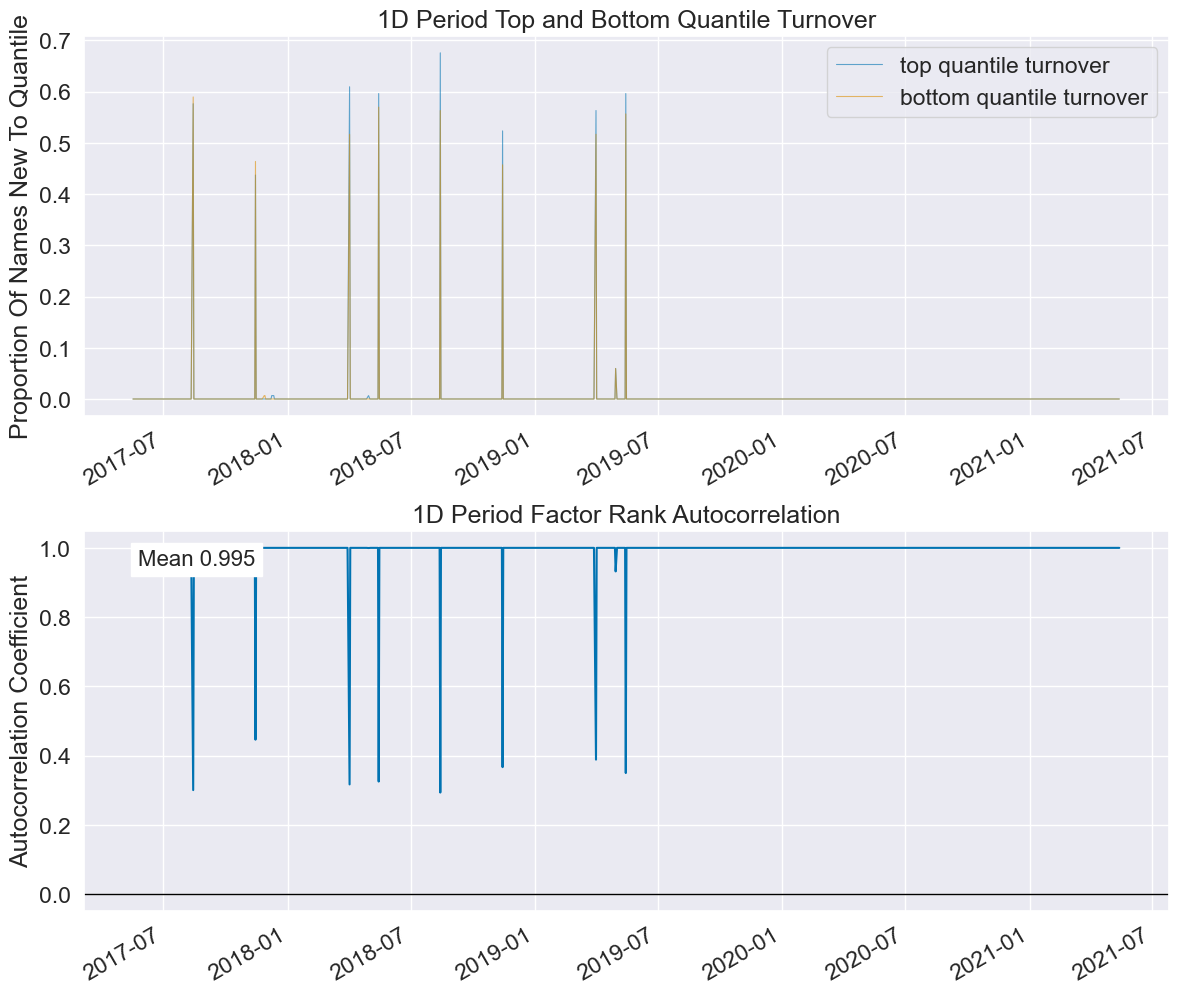

In [31]:
# 使用 Alphalens 進行第二主成份的因子分析
alphalens_factor_data = get_clean_factor_and_forward_returns(
    factor=principal_df[["PC2"]].squeeze(),
    prices=close_price_data,
    quantiles=5,
    periods=(1,),
)
create_full_tear_sheet(alphalens_factor_data)

Dropped 0.1% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-40.567850,-0.086428,-0.209596,1.140812,146923,20.026689
2,-0.121804,-0.052865,-0.078981,0.015420,146917,20.025871
3,-0.080869,-0.027349,-0.050322,0.011389,145956,19.894880
4,-0.048531,0.012383,-0.021229,0.012074,146917,20.025871
5,-0.012669,32.869146,0.359838,1.870546,146923,20.026689


Returns Analysis


,1D
Ann. alpha,0.035
beta,-0.169
Mean Period Wise Return Top Quantile (bps),0.213
Mean Period Wise Return Bottom Quantile (bps),0.983
Mean Period Wise Spread (bps),-0.770


<Figure size 640x480 with 0 Axes>

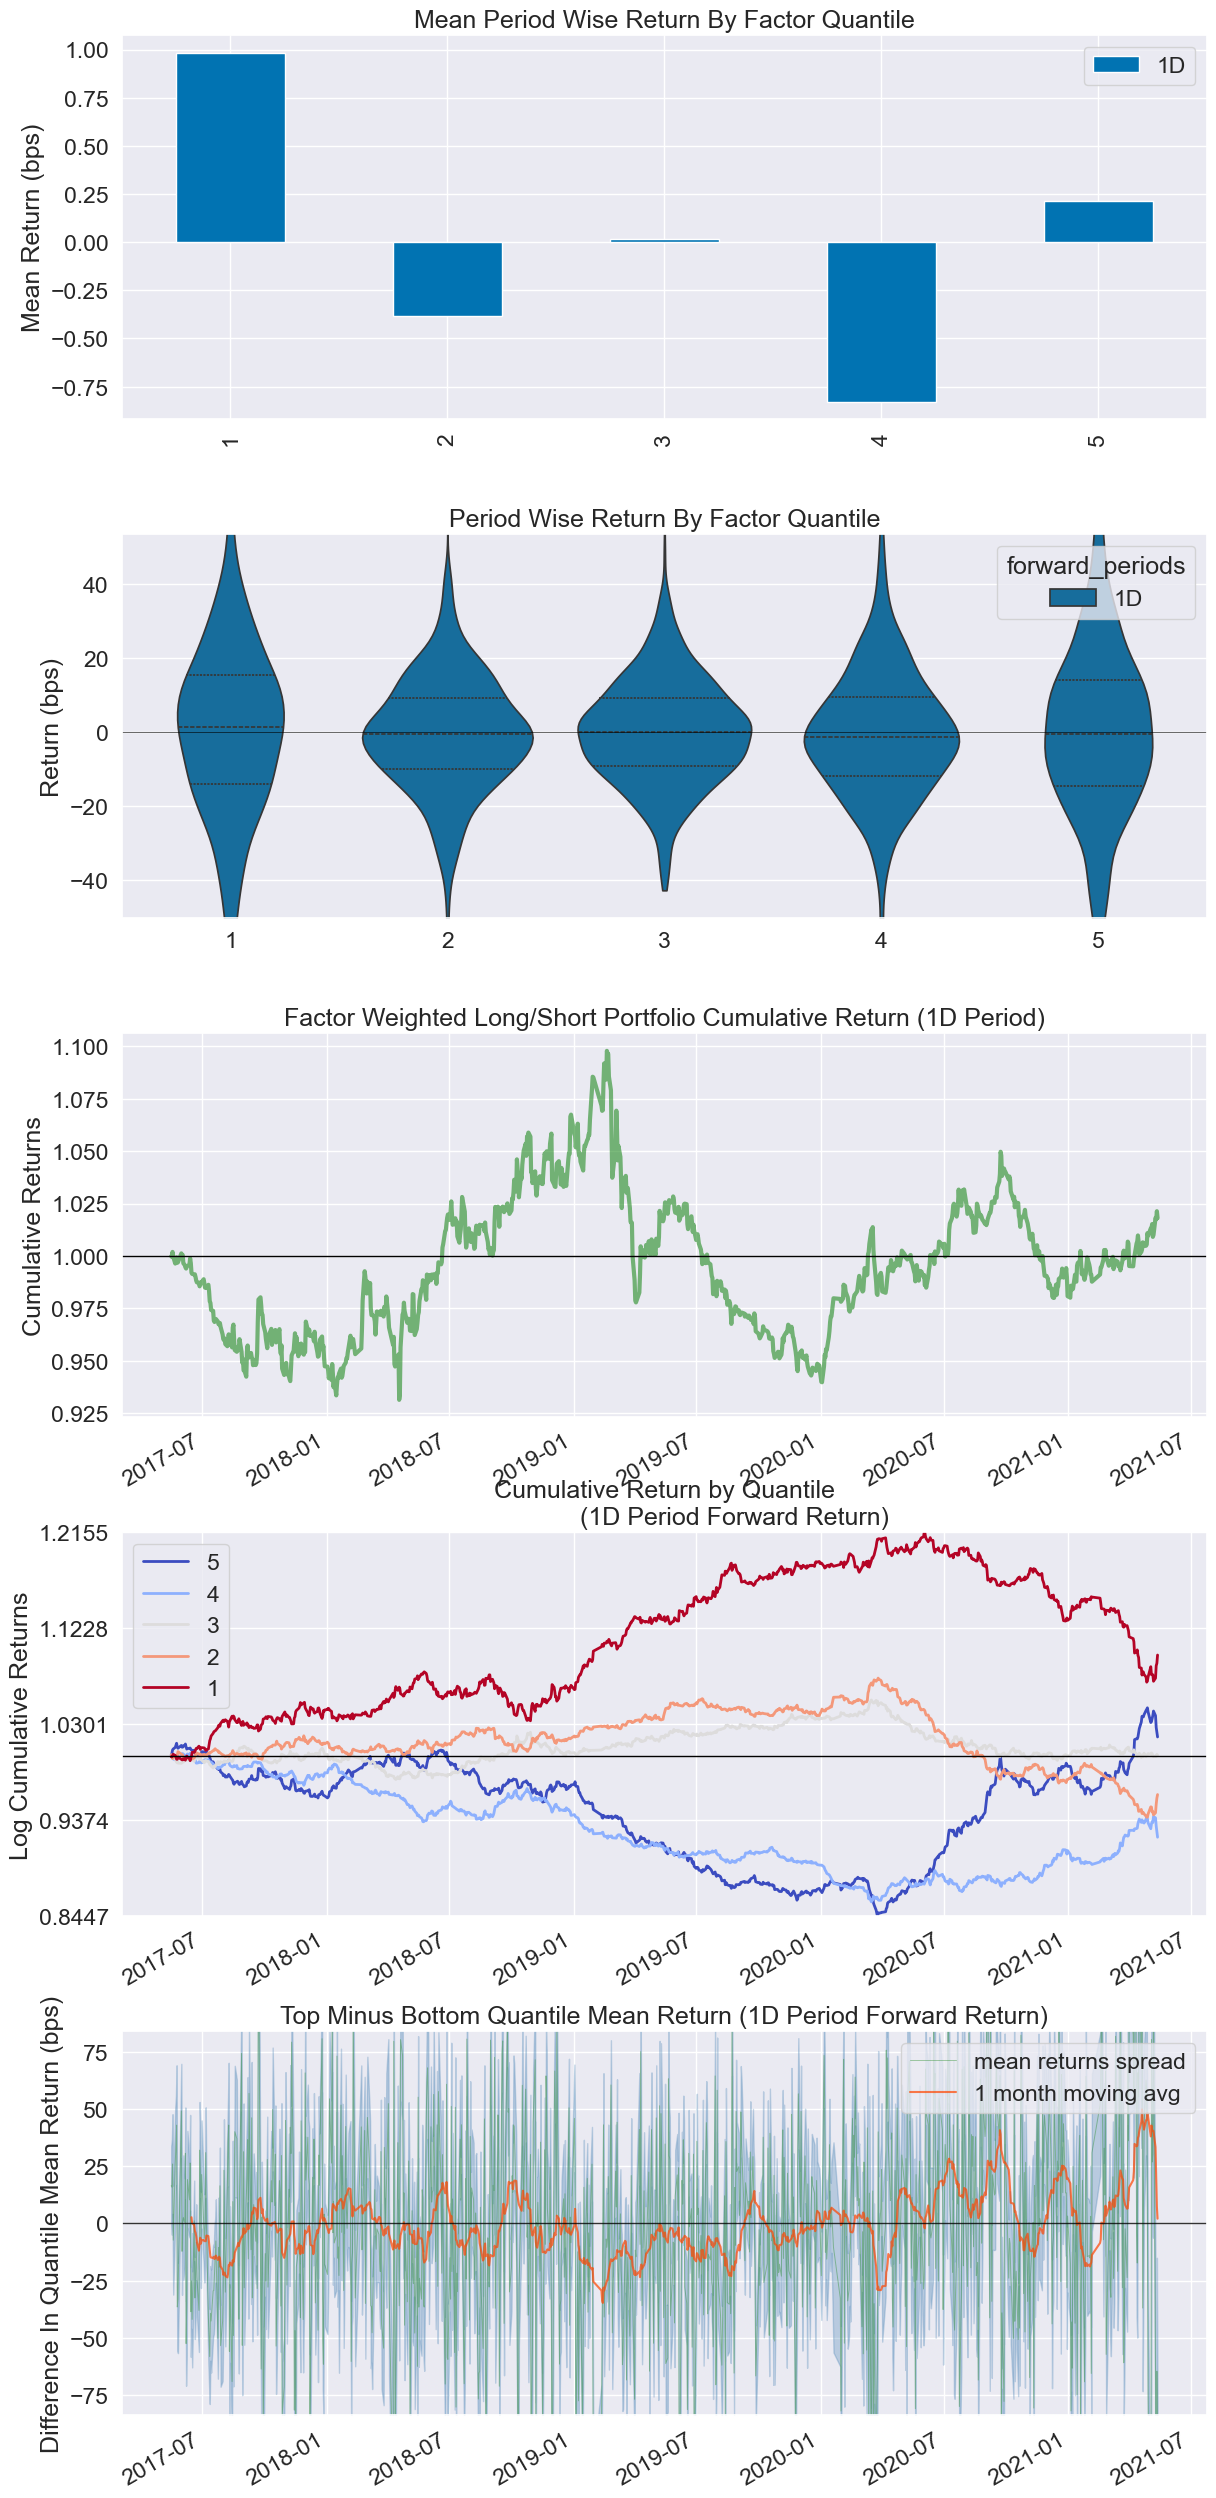

Information Analysis


,1D
IC Mean,-0.016
IC Std.,0.069
Risk-Adjusted IC,-0.232
t-stat(IC),-7.233
p-value(IC),0.000
IC Skew,-0.033
IC Kurtosis,0.029


/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/alphalens/performance.py:118: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouper.append(pd.Grouper(freq=by_time))


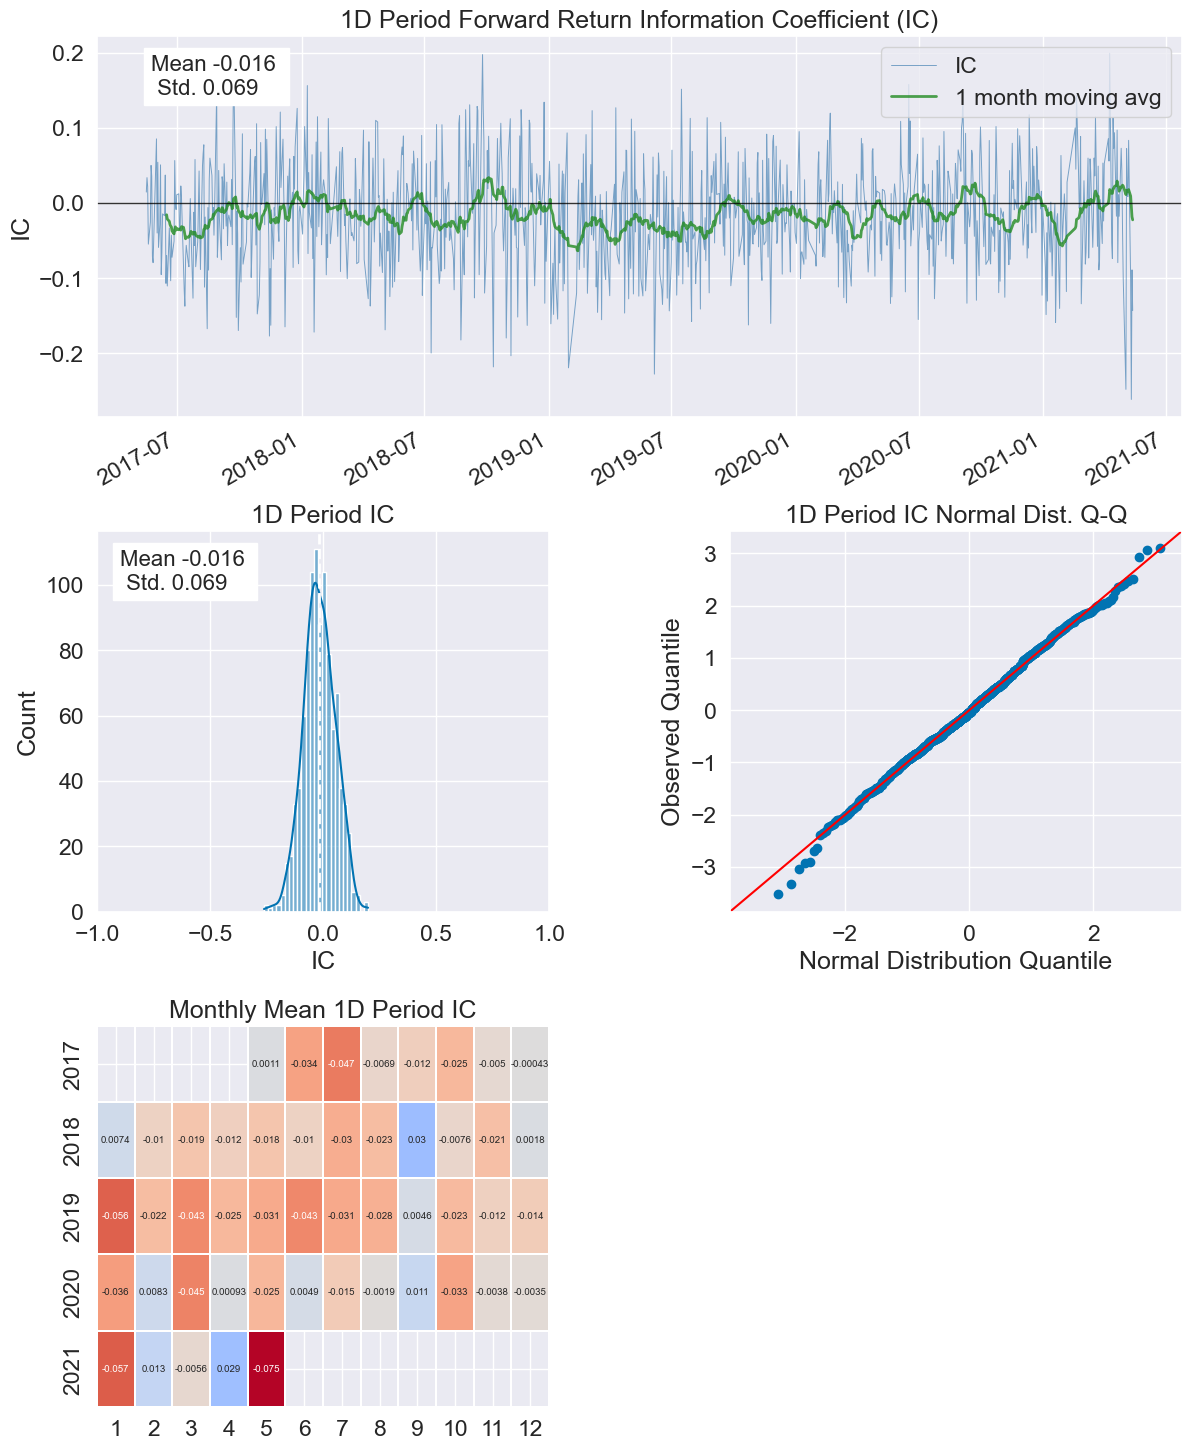

/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/alphalens/utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,1D
Quantile 1 Mean Turnover,0.004
Quantile 2 Mean Turnover,0.005
Quantile 3 Mean Turnover,0.005
Quantile 4 Mean Turnover,0.005
Quantile 5 Mean Turnover,0.003


,1D
Mean Factor Rank Autocorrelation,0.997


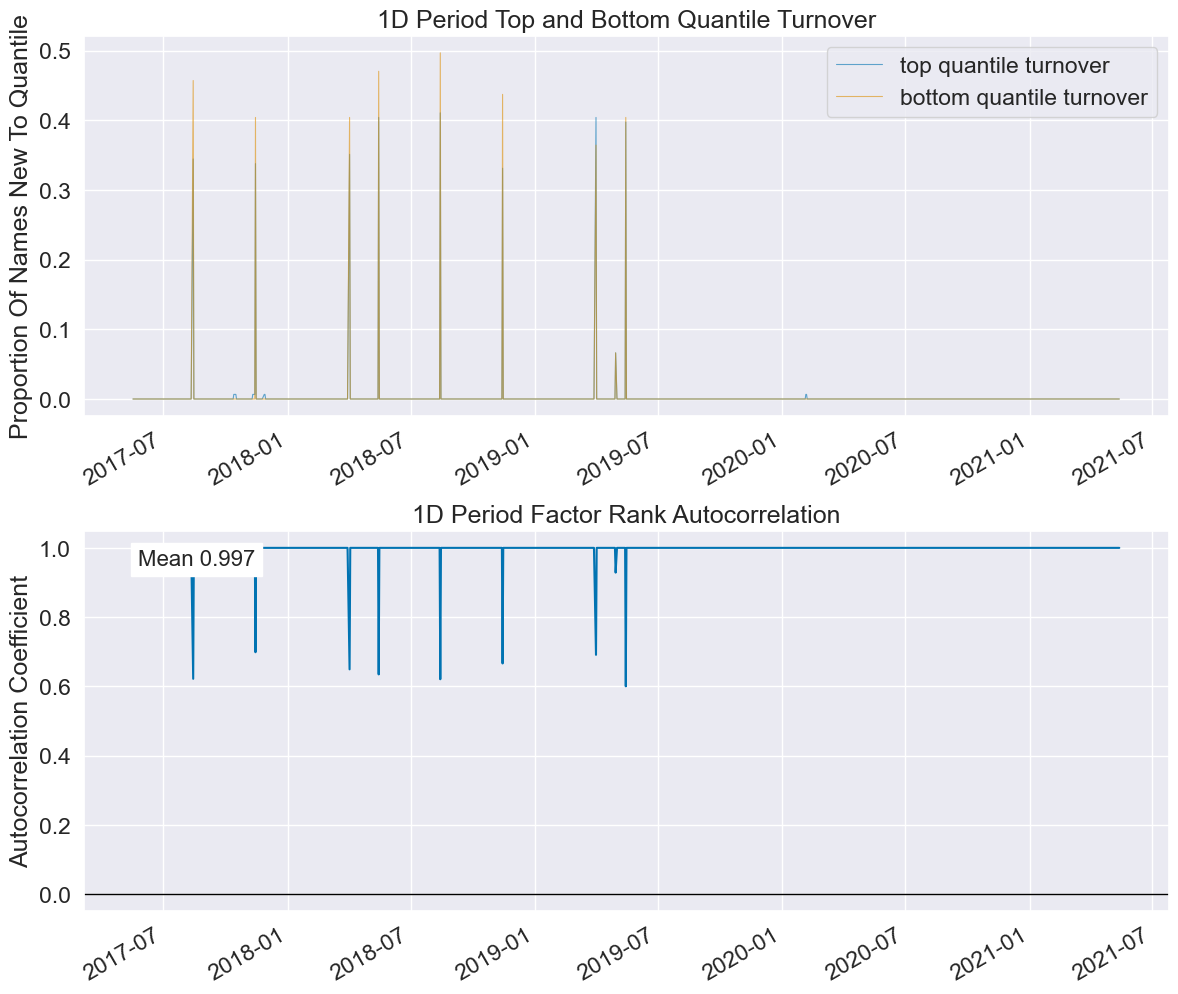

In [32]:
# 使用 Alphalens 進行第四主成份的因子分析
alphalens_factor_data = get_clean_factor_and_forward_returns(
    factor=principal_df[["PC4"]].squeeze(),
    prices=close_price_data,
    quantiles=5,
    periods=(1,),
)
create_full_tear_sheet(alphalens_factor_data)